In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

import random
import math
from scipy.linalg import eig

plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
# # This function plots the grid:
# def f_Plot_grid(M):
#     # Inputs:
#     # M, a matrix which keeps track of cells on the board
    
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     # plt.gca().set_aspect('equal', adjustable='box')
    
#     # Loop through the cells in the grid and plot the living cells:
#     # Note: Our matrix is indexed from left to right and from top to bottom,
#     # but our board is indexed from left to right and from bottom to top.
#     n = np.shape(M)[0]
#     for i in np.arange(n):
#         for j in np.arange(n):
#             if M.T[i,n-1-j] == 1:
#                 plt.scatter(i+0.5,j+0.5,s=250000/n**2,c="k",marker="s")
    
#     plt.xlim(0, n)
#     plt.ylim(0, n)
#     major_ticks = np.arange(0, n+1, 1)
#     ax.set_xticks(major_ticks)
#     ax.set_yticks(major_ticks)
#     ax.grid(which='both')
#     plt.show()
#     fig.clear(True)

In [18]:
# Random config
def f_rand_config(n,m=n):
  M = np.zeros(n**2)
  rand = np.random.choice(n**2, size=m, replace=False)
  for i in rand:
    M[i] = 1
  M = np.reshape(M,(n,n))
  return M

In [4]:
def f_Update(M,n):
  C = np.zeros((n,n))
  M2 = np.zeros((n,n))
  for i in np.arange(n):
    for j in np.arange(n):
      count = 0
      for q in np.array((-1,0,1)):
        for r in np.array((-1,0,1)):
          if i+q>=0 and i+q<=n-1 and j+r>=0 and j+r<=n-1 and (q != 0 or r != 0):
              count += M[i+q,j+r]
      if M[i,j] == 1 and (count == 2 or count == 3):
        M2[i,j] = 1
      if M[i,j] == 0 and count == 3:
        M2[i,j] = 1

  return M2

In [5]:
# n = 20
# M = np.zeros((n,n))
# M[5,4] = 1
# M[5,5] = 1
# M[4,5] = 1
# M[4,6] = 1
# M[3,4] = 1
# plt.imshow(M)

# M2 = f_Update(M,n)
# plt.imshow(M2)

In [10]:
def f_Compute_Conways(M,n,it):
    M_v = np.zeros((n,n,it))
    # %matplotlib inline
    for i in np.arange(it):
    #   plt.imshow(M)
      # f_Plot_grid(M)
      M = f_Update(M,n)
      M_v[:,:,i] = M
    #   plt.show()
    #   plt.pause(0.1)
    return M_v

In [16]:
# Enable interactive plot
%matplotlib notebook
import matplotlib.animation as animation

def init():
    im.set_data(np.zeros((n,n)))

def animate(i):
    im.set_data(M_v[:,:,i])
    return im, M

<IPython.core.display.Javascript object>


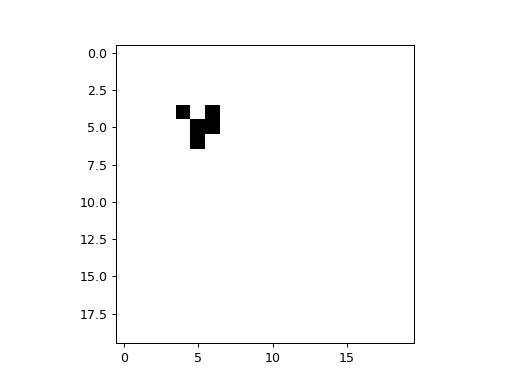

In [17]:
n = 20
it = 10

M = np.zeros((n,n))
M[5,4] = 1
M[5,5] = 1
M[4,5] = 1
M[4,6] = 1
M[3,4] = 1

M_v = f_Compute_Conways(M,n,it)

fig, ax = plt.subplots()
im = plt.imshow(M, cmap='gist_gray_r', vmin=0, vmax=1)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=it,interval=50)
plt.show()

<IPython.core.display.Javascript object>


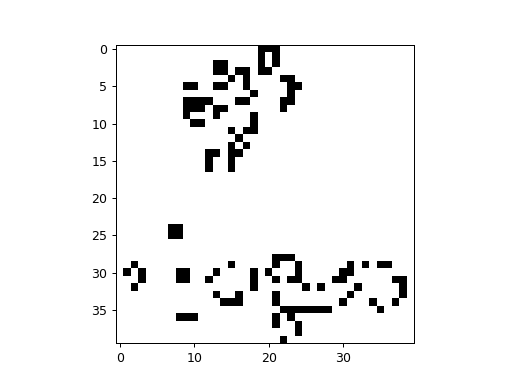

In [31]:
n = 40
it = 100

M = f_rand_config(n,n*5)
M_v = f_Compute_Conways(M,n,it)

fig, ax = plt.subplots()
im = plt.imshow(M, cmap='gist_gray_r', vmin=0, vmax=1)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=it,interval=100)
plt.show()